<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data load</a></span><ul class="toc-item"><li><span><a href="#Loading-individual-posts" data-toc-modified-id="Loading-individual-posts-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading individual posts</a></span></li><li><span><a href="#Map-thread-summary-table-info-to-posts" data-toc-modified-id="Map-thread-summary-table-info-to-posts-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Map thread summary table info to posts</a></span></li><li><span><a href="#Creating-one-message-for-all-posts-in-each-thread" data-toc-modified-id="Creating-one-message-for-all-posts-in-each-thread-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Creating one message for all posts in each thread</a></span></li><li><span><a href="#Creating-complete-df" data-toc-modified-id="Creating-complete-df-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Creating complete df</a></span></li><li><span><a href="#Cleaning-df" data-toc-modified-id="Cleaning-df-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Cleaning df</a></span></li></ul></li><li><span><a href="#Analysis-and-EDA-of-topics" data-toc-modified-id="Analysis-and-EDA-of-topics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis and EDA of topics</a></span><ul class="toc-item"><li><span><a href="#Titles" data-toc-modified-id="Titles-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Titles</a></span></li></ul></li><li><span><a href="#Message-cleaning-and-stopwords" data-toc-modified-id="Message-cleaning-and-stopwords-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Message cleaning and stopwords</a></span><ul class="toc-item"><li><span><a href="#Removing-contributor-names" data-toc-modified-id="Removing-contributor-names-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Removing contributor names</a></span></li><li><span><a href="#Removing-stopwords" data-toc-modified-id="Removing-stopwords-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Removing stopwords</a></span></li><li><span><a href="#Cleaning-posts-and-stem" data-toc-modified-id="Cleaning-posts-and-stem-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cleaning posts and stem</a></span></li><li><span><a href="#Most-frequent-words" data-toc-modified-id="Most-frequent-words-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Most frequent words</a></span></li><li><span><a href="#LDA-and-topic-modelling" data-toc-modified-id="LDA-and-topic-modelling-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LDA and topic modelling</a></span></li><li><span><a href="#Gridsearching-LDA" data-toc-modified-id="Gridsearching-LDA-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Gridsearching LDA</a></span></li><li><span><a href="#Visualising-topics" data-toc-modified-id="Visualising-topics-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Visualising topics</a></span><ul class="toc-item"><li><span><a href="#3-topics" data-toc-modified-id="3-topics-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>3 topics</a></span></li><li><span><a href="#5-topics" data-toc-modified-id="5-topics-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>5 topics</a></span></li></ul></li></ul></li><li><span><a href="#Word2Vec-and-word-associations" data-toc-modified-id="Word2Vec-and-word-associations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Word2Vec and word associations</a></span><ul class="toc-item"><li><span><a href="#Cleaning-data" data-toc-modified-id="Cleaning-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cleaning data</a></span></li><li><span><a href="#Fitting-model" data-toc-modified-id="Fitting-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fitting model</a></span></li></ul></li></ul></div>

# Imports

In [52]:
# Normal Imports
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set_style("whitegrid")
%matplotlib inline  

In [53]:
# Machine Learning Import
# Standard scaler
from sklearn.preprocessing import StandardScaler

# Resample
from sklearn.utils import resample

# Categorical
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV

# ANN
import keras
from keras.models import Sequential
from keras.layers import Dense

# Pipeline
from sklearn.pipeline import Pipeline

# Continuous
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

#Gridsearch and scoring
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

# Train test
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [54]:
#Importing NLP library
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
import string
import nltk
from sklearn.feature_extraction.text import TfidfTransformer

import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from gensim import models

# LDA
from __future__ import print_function

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

pd.options.mode.chained_assignment = None 
from gensim.models import word2vec

from sklearn.manifold import TSNE
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Josh
[nltk_data]     Lim\Anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data load
* Scraped data from https://saneforums.org/t5/Lived-Experience-Forum/ct-p/lived-experience-forum
* Scraped data from "Something is not right"and also "Our Stories"sections
* There were 24000 threads in total from these two sections. There are many posts per thread
* Initially topic modelling was performed from all posts within several large threads, however we found that many posts did not add meaningful information i.e responses to the posts were often not relevant to the topic that was posted. Therefore we decided to use only the first page of each thread
* Below we loaded the scraping of the first page of each threads. We then combined this with summary information of each thread

## Loading individual posts
* Loading csv files containing scraped posts

In [55]:
# Pandas
load_list = ["Sane_First_Page250","Sane_First_Page500","Sane_First_Page750","Sane_First_Page1000","Sane_First_Page1250","Sane_First_Page1430",
             "Sane_LivedExp_First_Page250","Sane_LivedExp_First_Page500","Sane_LivedExp_First_Page750","Sane_LivedExp_First_Page1000","Sane_LivedExp_First_Page1250"
            ,"Sane_LivedExp_First_Page1500","Sane_LivedExp_First_Page1750","Sane_LivedExp_First_Page2044"]

# load_list = ["sane_342576","sane_343422","sane_373335","sane_440985","sane_496188,168828,333859,267832,412327,295029,288842","sane_462317,388994,351010,361789,468699,480801","sane_337397,504745,473565,403207,366530,183607,401880,320884,375123,414607,68607,119130,453342,398663,85228"]

# error_list = ["sane_410382"]

In [56]:
# Loaded data (18/05) ["sane_342576","sane_343422","sane_373335","sane_440985","sane_496188,168828,333859,267832,412327,295029,288842","sane_462317,388994,351010,361789,468699,480801"]

In [57]:
all_threadsdf = pd.DataFrame()

appended_data = []
thread_counter = 0
post_counter = 0
for i in load_list:
    i.replace("'","")
    x = './Scraped Data/'+i+'.csv'
    y = pd.read_csv(x, warn_bad_lines=True, error_bad_lines=False,parse_dates=['date'])
    appended_data.append(y)
    print("posts in thread",len(y))
    post_counter += len(y)
    print("post total", post_counter)
    thread_counter += 1
    print("thread total", thread_counter)
    print("---------------------------------------")

all_threadsdf = pd.concat(appended_data, axis = 0)
print("final shape",all_threadsdf.shape)

posts in thread 2366
post total 2366
thread total 1
---------------------------------------
posts in thread 2043
post total 4409
thread total 2
---------------------------------------
posts in thread 1814
post total 6223
thread total 3
---------------------------------------
posts in thread 1655
post total 7878
thread total 4
---------------------------------------
posts in thread 1577
post total 9455
thread total 5
---------------------------------------
posts in thread 834
post total 10289
thread total 6
---------------------------------------
posts in thread 1830
post total 12119
thread total 7
---------------------------------------
posts in thread 1729
post total 13848
thread total 8
---------------------------------------
posts in thread 1874
post total 15722
thread total 9
---------------------------------------
posts in thread 1883
post total 17605
thread total 10
---------------------------------------
posts in thread 1689
post total 19294
thread total 11
---------------------

## Map thread summary table info to posts
* Also scraped summaries of each thread, to do analytics later, mapping them together to do future analysis

In [58]:
all_threadsdf.head()

Unnamed: 0 contributor                 date  \
0           0   outlander  2018-01-07 18:44:00   
1           1    NatalieS  2018-01-07 18:47:00   
2           2    greenpea  2018-01-07 18:53:00   
3           3    NatalieS  2018-01-07 18:54:00   
4           4   outlander  2018-01-07 18:55:00   

                                              dflink           likes  \
0  https://saneforums.org/t5/Something-s-not-righ...  ['3', 'Likes']   
1  https://saneforums.org/t5/Something-s-not-righ...  ['2', 'Likes']   
2  https://saneforums.org/t5/Something-s-not-righ...   ['1', 'Like']   
3  https://saneforums.org/t5/Something-s-not-righ...  ['2', 'Likes']   
4  https://saneforums.org/t5/Something-s-not-righ...   ['1', 'Like']   

                                             message                rank  \
0                    is anyone around to talk to atm  Senior Contributor   
1       Hi @outlanderhow are you?  what's happening?  Senior Contributor   
2  @outlander of course. What's happening?\r\n\r\...  Senior Contributor   
3    Hi @outlanderIs it ok if I sit with you awhile?  Senior Contributor   
4  hi @NatalieS and thank youi dont usually creat...  Senior Contributor   

            title  
0      rough time  
1  Re: rough time  
2  Re: rough time  
3  Re: rough time  
4  Re: rough time

In [59]:
Livedexpdf = pd.read_csv("./Scraped Data/Sane_LivedExp_210518.csv", parse_dates=['time'])
Somethingnotrightdf = pd.read_excel("./Scraped Data/Sane_Somethingnotright_170518.xlsx", parse_dates= True)

C:\Users\Josh Lim\Anaconda3\lib\site-packages\pandas\io\excel.py:380: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


In [60]:
all_threadsdf1 = all_threadsdf.reset_index()

In [62]:
# Creating indexes from our main dataframe
Something_not_right = all_threadsdf1["dflink"].str.contains("Something-s-not-right")
Something_not_right = Something_not_right[Something_not_right].index
Our_experience = all_threadsdf1["dflink"].str.contains("Our-experience-stories")
Our_experience = Our_experience[Our_experience].index

In [63]:
# Creating relevant df of summary table
# Livedexpdf.loc[0,["link","contributor","likes","replies","views"]]
livedmap = Livedexpdf.loc[:,["link","contributor","likes","replies","views"]]
notrightdmap = Somethingnotrightdf.loc[:,["link","contributor","likes","replies","views"]]

In [64]:
notrightdmap.head()

link contributor  \
5    https://saneforums.org/t5/Something-s-not-righ...   outlander   
0    https://saneforums.org/t5/Something-s-not-righ...    Mazarita   
3    https://saneforums.org/t5/Something-s-not-righ...      Snowie   
6    https://saneforums.org/t5/Something-s-not-righ...        Zoe7   
156  https://saneforums.org/t5/Something-s-not-righ...   outlander   

           likes        replies        views  
5     8842 Likes   5631 Replies   1964 Views  
0    16270 Likes   7076 Replies   4325 Views  
3     4279 Likes   1753 Replies   1195 Views  
6    43870 Likes  23160 Replies  12581 Views  
156   5767 Likes   5227 Replies   1704 Views

In [65]:
Posts_ourexp = all_threadsdf1.loc[Our_experience]
Posts_ourexp_merged = Posts_ourexp.merge(livedmap,how = "left", left_on="dflink", right_on="link",suffixes=("_post","_summary"))
print(Posts_ourexp_merged.shape)

(14417, 14)


In [66]:
Posts_notright = all_threadsdf1.loc[Something_not_right]
Posts_notright_merged = Posts_notright.merge(notrightdmap,how = "left", left_on="dflink", right_on="link",suffixes=("_post","_summary"))
print(Posts_notright_merged.shape)

(10289, 14)


In [67]:
print(Posts_ourexp_merged.columns)
print(Posts_notright_merged.columns)

Index(['index', 'Unnamed: 0', 'contributor_post', 'date', 'dflink',
       'likes_post', 'message', 'rank', 'title', 'link', 'contributor_summary',
       'likes_summary', 'replies', 'views'],
      dtype='object')
Index(['index', 'Unnamed: 0', 'contributor_post', 'date', 'dflink',
       'likes_post', 'message', 'rank', 'title', 'link', 'contributor_summary',
       'likes_summary', 'replies', 'views'],
      dtype='object')


In [68]:
all_threadsdf2 = pd.concat((Posts_notright_merged,Posts_ourexp_merged))
all_threadsdf2.drop(columns=["index","Unnamed: 0","dflink"], axis = 1, inplace = True)
print(all_threadsdf2.shape)
all_threadsdf2.info()

(24706, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24706 entries, 0 to 14416
Data columns (total 11 columns):
contributor_post       24704 non-null object
date                   24703 non-null object
likes_post             16767 non-null object
message                24547 non-null object
rank                   22999 non-null object
title                  24704 non-null object
link                   24706 non-null object
contributor_summary    24706 non-null object
likes_summary          24706 non-null object
replies                24706 non-null object
views                  24706 non-null object
dtypes: object(11)
memory usage: 2.3+ MB


In [69]:
print("number of posts", all_threadsdf2.shape[0])
print("number of unique posts", all_threadsdf2["link"].nunique())
print("number of unique contributors", all_threadsdf2["contributor_summary"].nunique())

number of posts 24706
number of unique posts 3472
number of unique contributors 1514


In [70]:
all_threadsdf2.head()

contributor_post                 date      likes_post  \
0        outlander  2018-01-07 18:44:00  ['3', 'Likes']   
1         NatalieS  2018-01-07 18:47:00  ['2', 'Likes']   
2         greenpea  2018-01-07 18:53:00   ['1', 'Like']   
3         NatalieS  2018-01-07 18:54:00  ['2', 'Likes']   
4        outlander  2018-01-07 18:55:00   ['1', 'Like']   

                                             message                rank  \
0                    is anyone around to talk to atm  Senior Contributor   
1       Hi @outlanderhow are you?  what's happening?  Senior Contributor   
2  @outlander of course. What's happening?\r\n\r\...  Senior Contributor   
3    Hi @outlanderIs it ok if I sit with you awhile?  Senior Contributor   
4  hi @NatalieS and thank youi dont usually creat...  Senior Contributor   

            title                                               link  \
0      rough time  https://saneforums.org/t5/Something-s-not-righ...   
1  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   
2  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   
3  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   
4  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   

  contributor_summary likes_summary       replies       views  
0           outlander    8842 Likes  5631 Replies  1964 Views  
1           outlander    8842 Likes  5631 Replies  1964 Views  
2           outlander    8842 Likes  5631 Replies  1964 Views  
3           outlander    8842 Likes  5631 Replies  1964 Views  
4           outlander    8842 Likes  5631 Replies  1964 Views

## Creating one message for all posts in each thread
* Some posts are very short and do not contain much information, but are still relevant, i.e. it might be a short response to a question. Therefore instead of deleting posts under a certain size, i have merged all posts within a thread into one big message. Note this is only for the first 10 posts for each thread, since i only scraped the first page of each thread

In [71]:
# Joining message column
all_threadsdf2["message"]= all_threadsdf2["message"].astype(str)
df  = all_threadsdf2.groupby('link')['message'].apply(','.join).reset_index()

In [72]:
all_threadsdf2["title"].value_counts().head()

Re: Struggling                         49
Re: Borderline Personality Disorder    38
Re: My Story                           36
Re: Help                               34
Re: Good morning                       30
Name: title, dtype: int64

In [73]:
all_threadsdf2["contributor_summary"].value_counts().head()

Queenie     719
Chris       517
Eden1919    397
BlueBay     367
utopia      351
Name: contributor_summary, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 2 columns):
link       3472 non-null object
message    3472 non-null object
dtypes: object(2)
memory usage: 54.3+ KB


In [75]:
df.head()

link  \
0  https://saneforums.org/t5/Our-experience-stori...   
1  https://saneforums.org/t5/Our-experience-stori...   
2  https://saneforums.org/t5/Our-experience-stori...   
3  https://saneforums.org/t5/Our-experience-stori...   
4  https://saneforums.org/t5/Our-experience-stori...   

                                             message  
0  Why are normal people more productive? And les...  
1  Hi everyone,I have just discovered this forum ...  
2  I have Bipolar 1. I'm medicated but recectly o...  
3  Just curious if anyone has watched this on Net...  
4  Hi Everyone,I am new hear, after being removed...

In [76]:
print(all_threadsdf2.shape)
all_threadsdf2.head()

(24706, 11)


contributor_post                 date      likes_post  \
0        outlander  2018-01-07 18:44:00  ['3', 'Likes']   
1         NatalieS  2018-01-07 18:47:00  ['2', 'Likes']   
2         greenpea  2018-01-07 18:53:00   ['1', 'Like']   
3         NatalieS  2018-01-07 18:54:00  ['2', 'Likes']   
4        outlander  2018-01-07 18:55:00   ['1', 'Like']   

                                             message                rank  \
0                    is anyone around to talk to atm  Senior Contributor   
1       Hi @outlanderhow are you?  what's happening?  Senior Contributor   
2  @outlander of course. What's happening?\r\n\r\...  Senior Contributor   
3    Hi @outlanderIs it ok if I sit with you awhile?  Senior Contributor   
4  hi @NatalieS and thank youi dont usually creat...  Senior Contributor   

            title                                               link  \
0      rough time  https://saneforums.org/t5/Something-s-not-righ...   
1  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   
2  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   
3  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   
4  Re: rough time  https://saneforums.org/t5/Something-s-not-righ...   

  contributor_summary likes_summary       replies       views  
0           outlander    8842 Likes  5631 Replies  1964 Views  
1           outlander    8842 Likes  5631 Replies  1964 Views  
2           outlander    8842 Likes  5631 Replies  1964 Views  
3           outlander    8842 Likes  5631 Replies  1964 Views  
4           outlander    8842 Likes  5631 Replies  1964 Views

In [77]:
all_threadsdf2[all_threadsdf2["message"].str.contains("draw attention to oneself")]["message"]

9757    Your not babbling and of course it's natural w...
Name: message, dtype: object

In [78]:
all_threadsdf2.columns

Index(['contributor_post', 'date', 'likes_post', 'message', 'rank', 'title',
       'link', 'contributor_summary', 'likes_summary', 'replies', 'views'],
      dtype='object')

In [79]:
summary_df = all_threadsdf2[["title","date","link","contributor_summary","rank",'likes_summary', 'replies', 'views']]
# summary_df.set_index("link",inplace = True)

In [80]:
summary_df.head()

title                 date  \
0      rough time  2018-01-07 18:44:00   
1  Re: rough time  2018-01-07 18:47:00   
2  Re: rough time  2018-01-07 18:53:00   
3  Re: rough time  2018-01-07 18:54:00   
4  Re: rough time  2018-01-07 18:55:00   

                                                link contributor_summary  \
0  https://saneforums.org/t5/Something-s-not-righ...           outlander   
1  https://saneforums.org/t5/Something-s-not-righ...           outlander   
2  https://saneforums.org/t5/Something-s-not-righ...           outlander   
3  https://saneforums.org/t5/Something-s-not-righ...           outlander   
4  https://saneforums.org/t5/Something-s-not-righ...           outlander   

                 rank likes_summary       replies       views  
0  Senior Contributor    8842 Likes  5631 Replies  1964 Views  
1  Senior Contributor    8842 Likes  5631 Replies  1964 Views  
2  Senior Contributor    8842 Likes  5631 Replies  1964 Views  
3  Senior Contributor    8842 Likes  5631 Replies  1964 Views  
4  Senior Contributor    8842 Likes  5631 Replies  1964 Views

## Creating complete df

In [81]:
df_summary = df.merge(summary_df,how = "inner",left_on="link",right_on="link")

In [82]:
df_summary.shape

(24706, 9)

In [83]:
test = df_summary["title"].value_counts()
test2 = test > 2
test[test2].index

Index(['Re: Struggling', 'Re: Borderline Personality Disorder', 'Re: My Story',
       'Re: Help', 'Re: Good morning', 'Re: Hi', 'Re: New here', 'Re: Fear',
       'Re: Hello', 'Re: Relapse',
       ...
       'Re: Death of My Idol', 'Re: PLEASE PLEASE help me i am very scared!',
       'Re: Bipolar 2 - diagnosis\r\n\r\n\t\t\t\t[ Edited ]',
       'Re: ARRGGHHH!!!!! I need silence!!!!!',
       'Re: Hearing that 30 year high school is coming up has triggered things in me',
       'Re: The revision of a previous post.', 'Re: Black hole',
       'Re: SUBCONSCIOUS RETALIATION', 'Re: Going into mental health unit',
       'Re: thoughts about being chronically suicidal'],
      dtype='object', length=2907)

In [84]:
df_summary[df_summary["message"].str.contains("someone please explain to me")]

link  \
24553  https://saneforums.org/t5/Something-s-not-righ...   
24554  https://saneforums.org/t5/Something-s-not-righ...   
24555  https://saneforums.org/t5/Something-s-not-righ...   
24556  https://saneforums.org/t5/Something-s-not-righ...   
24557  https://saneforums.org/t5/Something-s-not-righ...   
24558  https://saneforums.org/t5/Something-s-not-righ...   
24559  https://saneforums.org/t5/Something-s-not-righ...   
24560  https://saneforums.org/t5/Something-s-not-righ...   
24561  https://saneforums.org/t5/Something-s-not-righ...   
24562  https://saneforums.org/t5/Something-s-not-righ...   

                                                 message  \
24553  HiCan someone please explain to me what is the...   
24554  HiCan someone please explain to me what is the...   
24555  HiCan someone please explain to me what is the...   
24556  HiCan someone please explain to me what is the...   
24557  HiCan someone please explain to me what is the...   
24558  HiCan someone please explain to me what is the...   
24559  HiCan someone please explain to me what is the...   
24560  HiCan someone please explain to me what is the...   
24561  HiCan someone please explain to me what is the...   
24562  HiCan someone please explain to me what is the...   

                             title                 date contributor_summary  \
24553              voices/thoughts  2017-04-10 20:46:00         STORMGRL101   
24554          Re: voices/thoughts  2017-04-10 21:31:00         STORMGRL101   
24555          Re: voices/thoughts  2017-04-10 22:58:00         STORMGRL101   
24556          Re: voices/thoughts  2017-04-10 23:02:00         STORMGRL101   
24557          Re: voices/thoughts  2017-04-10 23:14:00         STORMGRL101   
24558          Re: voices/thoughts  2017-04-10 23:22:00         STORMGRL101   
24559          Re: voices/thoughts  2017-04-11 18:55:00         STORMGRL101   
24560  -\r\n\r\n\t\t\t\t[ Edited ]  2017-04-11 19:21:00         STORMGRL101   
24561          Re: voices/thoughts  2017-04-11 19:51:00         STORMGRL101   
24562          Re: voices/thoughts  2017-06-12 20:21:00         STORMGRL101   

                     rank likes_summary    replies      views  
24553  Senior Contributor      22 Likes  9 Replies  181 Views  
24554  Senior Contributor      22 Likes  9 Replies  181 Views  
24555  Senior Contributor      22 Likes  9 Replies  181 Views  
24556  Senior Contributor      22 Likes  9 Replies  181 Views  
24557     Community Guide      22 Likes  9 Replies  181 Views  
24558  Senior Contributor      22 Likes  9 Replies  181 Views  
24559     Community Guide      22 Likes  9 Replies  181 Views  
24560                 NaN      22 Likes  9 Replies  181 Views  
24561  Senior Contributor      22 Likes  9 Replies  181 Views  
24562  Senior Contributor      22 Likes  9 Replies  181 Views

In [85]:
# Dropping duplicates
duplicates = df_summary[df_summary["title"].str.contains("Re:") == True].index
df_summary_unique = df_summary.drop(duplicates)
df_summary_unique.drop_duplicates("link",inplace = True)

In [86]:
df_summary_unique.shape

(3456, 9)

## Cleaning df

In [87]:
#Converting likes to numeric
df_summary_unique["likes_summary"] = df_summary_unique["likes_summary"].str.extract(r'([0-9]+)')
df_summary_unique["likes_summary"] = df_summary_unique["likes_summary"].fillna(value = 0)
df_summary_unique["likes_summary"] = df_summary_unique["likes_summary"].astype(int)

C:\Users\Josh Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [88]:
df_summary_unique["replies"] = df_summary_unique["replies"].str.extract(r'([0-9]+)')
df_summary_unique["replies"] = df_summary_unique["replies"].fillna(value = 0)
df_summary_unique["replies"] = df_summary_unique["replies"].astype(int)

C:\Users\Josh Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [89]:
df_summary_unique["views"] = df_summary_unique["views"].str.extract(r'([0-9]+)')
df_summary_unique["views"] = df_summary_unique["views"].fillna(value = 0)
df_summary_unique["views"] = df_summary_unique["views"].astype(int)

C:\Users\Josh Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [90]:
# Converting null rank to former member, in line with title
df_summary_unique["rank"].fillna(value = "Former-Member",inplace = True)

In [91]:
# Joining title with message
df_summary["title"].fillna(" ",inplace = True)
df_summary_unique["Message_title"] = df_summary_unique["message"] + "," + df_summary_unique["title"] 

In [92]:
df_summary_unique.head()

link  \
0   https://saneforums.org/t5/Our-experience-stori...   
2   https://saneforums.org/t5/Our-experience-stori...   
6   https://saneforums.org/t5/Our-experience-stori...   
16  https://saneforums.org/t5/Our-experience-stori...   
26  https://saneforums.org/t5/Our-experience-stori...   

                                              message                  title  \
0   Why are normal people more productive? And les...    0 MOOD ON THE SCALE   
2   Hi everyone,I have just discovered this forum ...     1 year on from ECT   
6   I have Bipolar 1. I'm medicated but recectly o...      10 year Psychosis   
16  Just curious if anyone has watched this on Net...         13 reasons why   
26  Hi Everyone,I am new hear, after being removed...  14th year house bound   

                   date contributor_summary                rank  \
0   2014-08-20 17:23:00               CRAIG     New Contributor   
2   2015-12-22 16:08:00        roseasterisk     New Contributor   
6   2016-05-08 00:27:00      universepocket         Contributor   
16  2017-04-11 18:15:00              Ali585  Senior Contributor   
26  2015-05-14 10:54:00             Jacques     Community Elder   

    likes_summary  replies  views  \
0               5        1    438   
2               4        3   1365   
6              14       12   1011   
16             16       12    283   
26           2720     2719   8234   

                                        Message_title  
0   Why are normal people more productive? And les...  
2   Hi everyone,I have just discovered this forum ...  
6   I have Bipolar 1. I'm medicated but recectly o...  
16  Just curious if anyone has watched this on Net...  
26  Hi Everyone,I am new hear, after being removed...

In [93]:
df_summary_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 24696
Data columns (total 10 columns):
link                   3456 non-null object
message                3456 non-null object
title                  3456 non-null object
date                   3456 non-null object
contributor_summary    3456 non-null object
rank                   3456 non-null object
likes_summary          3456 non-null int32
replies                3456 non-null int32
views                  3456 non-null int32
Message_title          3456 non-null object
dtypes: int32(3), object(7)
memory usage: 256.5+ KB


In [94]:
df_summary_unique = df_summary_unique.reset_index()
df_summary_unique.drop(columns = "index", inplace = True)

In [95]:
df_summary_unique.head()

link  \
0  https://saneforums.org/t5/Our-experience-stori...   
1  https://saneforums.org/t5/Our-experience-stori...   
2  https://saneforums.org/t5/Our-experience-stori...   
3  https://saneforums.org/t5/Our-experience-stori...   
4  https://saneforums.org/t5/Our-experience-stori...   

                                             message                  title  \
0  Why are normal people more productive? And les...    0 MOOD ON THE SCALE   
1  Hi everyone,I have just discovered this forum ...     1 year on from ECT   
2  I have Bipolar 1. I'm medicated but recectly o...      10 year Psychosis   
3  Just curious if anyone has watched this on Net...         13 reasons why   
4  Hi Everyone,I am new hear, after being removed...  14th year house bound   

                  date contributor_summary                rank  likes_summary  \
0  2014-08-20 17:23:00               CRAIG     New Contributor              5   
1  2015-12-22 16:08:00        roseasterisk     New Contributor              4   
2  2016-05-08 00:27:00      universepocket         Contributor             14   
3  2017-04-11 18:15:00              Ali585  Senior Contributor             16   
4  2015-05-14 10:54:00             Jacques     Community Elder           2720   

   replies  views                                      Message_title  
0        1    438  Why are normal people more productive? And les...  
1        3   1365  Hi everyone,I have just discovered this forum ...  
2       12   1011  I have Bipolar 1. I'm medicated but recectly o...  
3       12    283  Just curious if anyone has watched this on Net...  
4     2719   8234  Hi Everyone,I am new hear, after being removed...

# Analysis and EDA of topics
* Ignore all of this section since this is incomplete, and will more be used for later analysis

In [96]:
# Creating a calc for modelling later
df_summary_unique["likesperview"] = df_summary_unique["likes_summary"] / df_summary_unique["views"]

In [97]:
df_summary_unique.head()

link  \
0  https://saneforums.org/t5/Our-experience-stori...   
1  https://saneforums.org/t5/Our-experience-stori...   
2  https://saneforums.org/t5/Our-experience-stori...   
3  https://saneforums.org/t5/Our-experience-stori...   
4  https://saneforums.org/t5/Our-experience-stori...   

                                             message                  title  \
0  Why are normal people more productive? And les...    0 MOOD ON THE SCALE   
1  Hi everyone,I have just discovered this forum ...     1 year on from ECT   
2  I have Bipolar 1. I'm medicated but recectly o...      10 year Psychosis   
3  Just curious if anyone has watched this on Net...         13 reasons why   
4  Hi Everyone,I am new hear, after being removed...  14th year house bound   

                  date contributor_summary                rank  likes_summary  \
0  2014-08-20 17:23:00               CRAIG     New Contributor              5   
1  2015-12-22 16:08:00        roseasterisk     New Contributor              4   
2  2016-05-08 00:27:00      universepocket         Contributor             14   
3  2017-04-11 18:15:00              Ali585  Senior Contributor             16   
4  2015-05-14 10:54:00             Jacques     Community Elder           2720   

   replies  views                                      Message_title  \
0        1    438  Why are normal people more productive? And les...   
1        3   1365  Hi everyone,I have just discovered this forum ...   
2       12   1011  I have Bipolar 1. I'm medicated but recectly o...   
3       12    283  Just curious if anyone has watched this on Net...   
4     2719   8234  Hi Everyone,I am new hear, after being removed...   

   likesperview  
0      0.011416  
1      0.002930  
2      0.013848  
3      0.056537  
4      0.330338

In [98]:
df_summary_unique["dep"] = df_summary_unique["Message_title"].str.lower().str.count("dep")
df_summary_unique["bipo"] = df_summary_unique["Message_title"].str.lower().str.count("bipo")
df_summary_unique["bpd"] = df_summary_unique["Message_title"].str.lower().str.count("bpd")
df_summary_unique["suic"] = df_summary_unique["Message_title"].str.lower().str.count("suic")
df_summary_unique["anxi"] = df_summary_unique["Message_title"].str.lower().str.count("anxi")
df_summary_unique["ptsd"] = df_summary_unique["Message_title"].str.lower().str.count("ptsd")
df_summary_unique["bipolar"] = df_summary_unique["bipo"] + df_summary_unique["bpd"]
df_summary_unique.drop(columns = ["bipo","bpd"],axis = 1,inplace = True)
df_summary_unique["total"] = df_summary_unique["dep"] + df_summary_unique["bipolar"] + df_summary_unique["suic"] + df_summary_unique["anxi"] + df_summary_unique["ptsd"]

In [99]:
df_summary_unique["job"] = df_summary_unique["Message_title"].str.lower().str.count("job")
df_summary_unique["work"] = df_summary_unique["Message_title"].str.lower().str.count("work")
df_summary_unique["work"] = df_summary_unique["Message_title"].str.lower().str.count("work")
df_summary_unique["abuse"] = df_summary_unique["Message_title"].str.lower().str.count("abus")
df_summary_unique["partner"] = df_summary_unique["Message_title"].str.lower().str.count("partner")
df_summary_unique["family"] = df_summary_unique["Message_title"].str.lower().str.count("famil")
df_summary_unique["frien"] = df_summary_unique["Message_title"].str.lower().str.count("frien")
df_summary_unique["relationship"] = df_summary_unique["Message_title"].str.lower().str.count("relati")

In [100]:
df_summary_unique.shape

(3456, 24)

In [101]:
df_summary_unique[["title","likes_summary"]].sort_values(by = "likes_summary", ascending = False)

title  likes_summary
2075                                      Am Not Coping          43870
2040              A long rave\r\n\r\n\t\t\t\t[ Edited ]          16270
2994                                      Riding a wave          12236
2604                                      I'm in a nest          11838
3403                                         rough time           8842
1558                                  Taking the plunge           5778
2568  I dont know how much longer i can go on like this           5767
3160  **Trigger warning** Stuck in world of sadness ...           4693
3448                       when is it time for hospital           4598
2165      Can someone help me\r\n\r\n\t\t\t\t[ Edited ]           4411
2805                                   My special place           4279
908                                  Life can be a Pain           3761
1598                           The great yoga adventure           2908
1413  SPRING-Clean Declutter - Need Help\r\n\r\n\t\t...           2908
1060  My Story and where to from here.. (very personal)           2756
4                                 14th year house bound           2720
588                                                HOME           2651
1055                                   My Hospital Stay           2393
2302                 -Enigma-\r\n\r\n\t\t\t\t[ Edited ]           1970
3085                              Struggling to Survive           1858
3164                                          Trouble !           1790
2241  Despair *potential trigger: abuse*\r\n\r\n\t\t...           1495
3109            THE dark side\r\n\r\n\t\t\t\t[ Edited ]           1459
1410  SAD (Seasonal Affective Disorder (SAD)\r\n\r\n...           1199
3004                                             Safety           1061
1068  My Thai Discovery Journey\r\n\r\n\t\t\t\t[ Edi...           1033
754                                           I feel...           1013
575                    Grief & loss - may be triggering            913
931   Living with PTSD (Potentially Triggering Mater...            825
645   Hey Life - give me a break.\r\n\r\n\t\t\t\t[ E...            764
...                                                 ...            ...
3151                                           Too hard              0
611   Having trouble with my wife understanding\r\n\...              0
1721                 What do you do? Tips/concentration              0
1521                              Strattera and anxiety              0
3142                             Thursday nite  madness              0
616                                          Heartbreak              0
2636                             I was raped as a child              0
2639                        IM GOING TO BREAK SOMETHING              0
2640                                        IM SO ANGRY              0
637                                       Help - please              0
1617                            The weekly friday feast              0
1620            There's something really wrong with me.              0
1628  Thought Broadcast Delusion - The Reason for Wh...              0
572                                     Gratitude posts              0
1701                                            Walkies              0
508                                 Felt overly anxious              0
2554  I cant go back to yesterday i was a different ...              0
1695                                           Very low              0
3198    Waiting on test results. Feels like an eternaty              0
3197                  WHY ISNT THE STUPID CHAT WORKING!              0
1674                                  Troubled thoughts              0
3192                        Volatile son making threats              0
1659                               Trapped in the world              0
3185                    Very scary but strange incident              0
3183                             VOICES ARE COMING BACK              0
318

## Titles
* Need more posts too many posts from same people

In [102]:
all_threadsdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24706 entries, 0 to 14416
Data columns (total 11 columns):
contributor_post       24704 non-null object
date                   24703 non-null object
likes_post             16767 non-null object
message                24706 non-null object
rank                   22999 non-null object
title                  24704 non-null object
link                   24706 non-null object
contributor_summary    24706 non-null object
likes_summary          24706 non-null object
replies                24706 non-null object
views                  24706 non-null object
dtypes: object(11)
memory usage: 2.3+ MB


Insight:
____________________________________________________________________________________________
From below: I need more post data, seems to have a large concentration on a few people

In [103]:
all_threadsdf2["title"].value_counts().head()

Re: Struggling                         49
Re: Borderline Personality Disorder    38
Re: My Story                           36
Re: Help                               34
Re: Good morning                       30
Name: title, dtype: int64

In [104]:
# top_contributors = 20
# x = all_threadsdf2["contributor"].value_counts() / len(all_threadsdf2)
# x[:top_contributors].sort_values(ascending = True).plot(kind = "barh", figsize = (10,6),title = "% of total posts by contributor")
# print("contributions from top {}: ".format(top_contributors), x[:top_contributors].sum())

In [105]:
all_threadsdf2["title1"] = all_threadsdf2["title"]

In [106]:
all_threadsdf2["title1"] = all_threadsdf2["title1"].str.replace("Re: ","")
all_threadsdf2["title1"] = all_threadsdf2["title1"].str.replace("\n","")
all_threadsdf2["title1"] = all_threadsdf2["title1"].str.replace("\r","")
all_threadsdf2["title1"] = all_threadsdf2["title1"].str.replace("\t","")
all_threadsdf2["title1"] = all_threadsdf2["title1"].str.replace("[","")
all_threadsdf2["title1"] = all_threadsdf2["title1"].str.replace("]","")
all_threadsdf2["title1"] = all_threadsdf2["title1"].str.replace("Edited"," ")

In [107]:
top_threads = 20
all_threadsdf2["title1"].value_counts()[:top_threads] / all_threadsdf2["title1"].value_counts().sum()

Struggling                         0.002267
My Story                           0.001700
Borderline Personality Disorder    0.001700
Help                               0.001619
Good morning                       0.001457
Hi                                 0.001457
New here                           0.001336
Fear                               0.001255
Hello                              0.001214
Relapse                            0.001214
BPD                                0.001174
Schizophrenia                      0.001133
Alone                              0.001133
Lonliness                          0.001012
My story                           0.001012
Lost                               0.001012
Voices                             0.000972
Our experience and stories         0.000931
Bipolar                            0.000850
Loneliness                         0.000850
Name: title1, dtype: float64

In [108]:
# Top threads
all_threadsdf2["title1"].value_counts()[:top_threads].index

Index(['Struggling', 'My Story', 'Borderline Personality Disorder', 'Help',
       'Good morning', 'Hi', 'New here', 'Fear', 'Hello', 'Relapse', 'BPD',
       'Schizophrenia', 'Alone', 'Lonliness', 'My story', 'Lost', 'Voices',
       'Our experience and stories', 'Bipolar', 'Loneliness'],
      dtype='object')

In [109]:
# Function to see composition by title
def contributor_title_composition(titles):
    contributor_title_df = pd.DataFrame()
    appended_data =[]
    cont_title = all_threadsdf2.groupby(["title1","contributor","rank"])[["contributor"]].count()
    for i in titles:
        total_cont = cont_title.sort_values(by="contributor", ascending = False).loc[i,:]["contributor"].sum()
        top_cont = cont_title.sort_values(by="contributor", ascending = False).loc[i,:].head(1)["contributor"].sum()/total_cont
        top3_cont = cont_title.sort_values(by="contributor", ascending = False).loc[i,:].head(3)["contributor"].sum()/total_cont
        top10_cont = cont_title.sort_values(by="contributor", ascending = False).loc[i,:].head(10)["contributor"].sum()/total_cont
        comp_df = pd.DataFrame([top_cont,top3_cont,top10_cont],columns=[i],index=["top","top3","top10"])
        appended_data.append(comp_df)
    contributor_title_df = pd.concat(appended_data, axis = 1)
    return(contributor_title_df)

Insight

--------------------------------------------------------------------------------------------
Thread composition for large threads
* Main contributor, contributes > 30%
* Top 3, contributors > 65% - meaning that few people that are very engaged. Also top 10 > 90%

In [110]:
# titles = ['Am Not Coping', 'Antisocial + schizophrenia + anxiety',
#        'I am riding a wave.', 'Feeling so sad, so lost',
#        'Stop !!! II don`t want to play anymore', 'HURTING :(',
#        'TRIGGERRED!!!!!', 'Angry and alone',
#        'Too "complex" for a psychiatrist???', 'life is too hard', 'rough time',
#        'My toxic job is killing me, is it ok to quit?',
#        'Seeing my therapist tomorrow.',
#        'It is 2.30am have to stop myself from going for a walk',
#        "image can't get rid of", 'Lonliness', 'Overseas move gone wrong?',
#        'Explanation for behaviour...??', 'The mental health system explained',
#        'What is Lifeline counselling like?']

# contributor_title_composition(titles).plot(kind = "barh", figsize = (10,6),title = "Composition of Thread by Contributors")

# Message cleaning and stopwords

In [111]:
# df_summary_unique["dep"] = df_summary_unique["Message_title"].str.lower().str.count("dep")
# df_summary_unique["bipo"] = df_summary_unique["Message_title"].str.lower().str.count("bipo")
# df_summary_unique["bpd"] = df_summary_unique["Message_title"].str.lower().str.count("bpd")
# df_summary_unique["suic"] = df_summary_unique["Message_title"].str.lower().str.count("suic")
# df_summary_unique["anxi"] = df_summary_unique["Message_title"].str.lower().str.count("anxi")
# df_summary_unique["ptsd"] = df_summary_unique["Message_title"].str.lower().str.count("ptsd")
# df_summary_unique["bipolar"] = df_summary_unique["bipo"] + df_summary_unique["bpd"]
# df_summary_unique.drop(columns = ["bipo","bpd"],axis = 1,inplace = True)
# df_summary_unique["total"] = df_summary_unique["dep"] + df_summary_unique["bipolar"] + df_summary_unique["suic"] + df_summary_unique["anxi"] + df_summary_unique["ptsd"]

In [112]:
df_summary_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 24 columns):
link                   3456 non-null object
message                3456 non-null object
title                  3456 non-null object
date                   3456 non-null object
contributor_summary    3456 non-null object
rank                   3456 non-null object
likes_summary          3456 non-null int32
replies                3456 non-null int32
views                  3456 non-null int32
Message_title          3456 non-null object
likesperview           3455 non-null float64
dep                    3456 non-null int64
suic                   3456 non-null int64
anxi                   3456 non-null int64
ptsd                   3456 non-null int64
bipolar                3456 non-null int64
total                  3456 non-null int64
job                    3456 non-null int64
work                   3456 non-null int64
abuse                  3456 non-null int64
partner                3

In [113]:
# Using regex groups - here we have frequently used post signatures that we are removing

pat1 = r"She gave away the secrets of her past .... she's lost control again .... see the danger always danger ....."
df_summary_unique["Message_title"] = df_summary_unique["Message_title"].str.replace(pat1," ")

pat2 = r"wake up in the middle of the thunder of a scream and you realise it was yours"
df_summary_unique["Message_title"] = df_summary_unique["Message_title"].str.replace(pat2," ")

pat3 = r"Accept my feelings. Know my purpose. Do what needs to be done"
df_summary_unique["Message_title"] = df_summary_unique["Message_title"].str.replace(pat3," ")

pat4 = r"Derive comfort from assigned purpose and fear not the uncertainty of freedom"
df_summary_unique["Message_title"] = df_summary_unique["Message_title"].str.replace(pat4," ")

pat0 = r"[^a-zA-Z]"
df_summary_unique["Message_title"] = df_summary_unique["Message_title"].str.replace(pat0," ")

In [114]:
df_summary_unique[df_summary_unique["Message_title"].str.contains("Edited")]

link  \
17    https://saneforums.org/t5/Our-experience-stori...   
19    https://saneforums.org/t5/Our-experience-stori...   
21    https://saneforums.org/t5/Our-experience-stori...   
24    https://saneforums.org/t5/Our-experience-stori...   
52    https://saneforums.org/t5/Our-experience-stori...   
53    https://saneforums.org/t5/Our-experience-stori...   
57    https://saneforums.org/t5/Our-experience-stori...   
59    https://saneforums.org/t5/Our-experience-stori...   
62    https://saneforums.org/t5/Our-experience-stori...   
77    https://saneforums.org/t5/Our-experience-stori...   
91    https://saneforums.org/t5/Our-experience-stori...   
103   https://saneforums.org/t5/Our-experience-stori...   
118   https://saneforums.org/t5/Our-experience-stori...   
120   https://saneforums.org/t5/Our-experience-stori...   
182   https://saneforums.org/t5/Our-experience-stori...   
216   https://saneforums.org/t5/Our-experience-stori...   
234   https://saneforums.org/t5/Our-experience-stori...   
252   https://saneforums.org/t5/Our-experience-stori...   
255   https://saneforums.org/t5/Our-experience-stori...   
264   https://saneforums.org/t5/Our-experience-stori...   
286   https://saneforums.org/t5/Our-experience-stori...   
302   https://saneforums.org/t5/Our-experience-stori...   
306   https://saneforums.org/t5/Our-experience-stori...   
325   https://saneforums.org/t5/Our-experience-stori...   
328   https://saneforums.org/t5/Our-experience-stori...   
345   https://saneforums.org/t5/Our-experience-stori...   
352   https://saneforums.org/t5/Our-experience-stori...   
355   https://saneforums.org/t5/Our-experience-stori...   
366   https://saneforums.org/t5/Our-experience-stori...   
375   https://saneforums.org/t5/Our-experience-stori...   
...                                                 ...   
2791  https://saneforums.org/t5/Something-s-not-righ...   
2800  https://saneforums.org/t5/Something-s-not-righ...   
2811  https://saneforums.org/t5/Something-s-not-righ...   
2845  https://saneforums.org/t5/Something-s-not-righ...   
2847  https://saneforums.org/t5/Something-s-not-righ...   
2862  https://saneforums.org/t5/Something-s-not-righ...   
2867  https://saneforums.org/t5/Something-s-not-righ...   
2876  https://saneforums.org/t5/Something-s-not-righ...   
2884  https://saneforums.org/t5/Something-s-not-righ...   
2926  https://saneforums.org/t5/Something-s-not-righ...   
3059  https://saneforums.org/t5/Something-s-not-righ...   
3070  https://saneforums.org/t5/Something-s-not-righ...   
3084  https://saneforums.org/t5/Something-s-not-righ...   
3100  https://saneforums.org/t5/Something-s-not-righ...   
3109  https://saneforums.org/t5/Something-s-not-righ...   
3115  https://saneforums.org/t5/Something-s-not-righ...   
3120  https://saneforums.org/t5/Something-s-not-righ...   
3122  https://saneforums.org/t5/Something-s-not-righ...   
3143  https://saneforums.org/t5/Something-s-not-righ...   
3159  https://saneforums.org/t5/Something-s-not-righ...   
3160  https://saneforums.org/t5/Something-s-not-righ...   
3240  https://saneforums.org/t5/Something-s-not-righ...   
3275  https://saneforums.org/t5/Something-s-not-righ...   
3294  https://saneforums.org/t5/Something-s-not-righ...   
3341  https://saneforums.org/t5/Something-s-not-righ...   
3343  https://saneforums.org/t5/Something-s-not-righ...   
3362  https://saneforums.org/t5/Something-s-not-righ...   
3404  https://saneforums.org/t5/Something-s-not-righ...   
3434  https://saneforums.org/t5/Something-s-not-righ...   
3454  https://saneforums.org/t5/Something-s-not-righ...   

                                                message  \
17    I'm fairly sure most of us have been there. Th...   
19    I just wanted to say, I had a freaky trip a fe...   
21    Hi @NikNik, This is a paper, on social phobia ...   
24    My story will go for decades...... A majority ...   
52    It is strange that I hear that governments are...   
53    Hi There, I have a question to m

## Removing contributor names

In [115]:
# Removing contributor names using stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['just', 'like', 'know', 'outlander',"im","member","don","snowie"]

# Appending contributor names to stopwords
all_threadsdf2["contributor_post"] = all_threadsdf2["contributor_post"].astype(str)
contributor_list = all_threadsdf2["contributor_post"].unique()
contributor_listing = []
for x in contributor_list:
    contributor_listing.append(x.lower())
    
contributor_listing2 = []
for x in contributor_listing:
    contributor_listing2.append("@"+x)

for x in contributor_listing:
    newStopWords.append(x)
    
for x in contributor_listing2:
    newStopWords.append(x)

stopwords.extend(newStopWords)

In [116]:
# review = " ".join(df_summary_unique["Message_title"])
# # review
# # review.contains("scream")

## Removing stopwords
* Reviewed the most common words and have sequentially removed those that have not added any value. It should be noted that when i ran the Word2Vec algorithm below, i tried to see if ignoring the stopwords was more insightful than removing stopwords. I found that removing stopwords was far more insightful
* Note that i am using the i am adding the stemmed words to stop words as i use stemming below

In [117]:
# Review top 100

oneword_stopwords = stopwords

oneword_new1 = ["told","glad","anoth","person","help","time","peopl","one","feel",'get', 'go', 'think', 'thing', 'realli', 'want',"get","time"
       'one', 'tri', 'see', 'need','would', 'hi', 'good','much', 'make', 'take', 'also', 'find', 
        'day', 'talk','way', 'say', 'well', 'even', 'year', 'thank','back', 'could', 'lot', 'keep', 'someth', 'better',
       'right', 'come', 'look', 'start', 'us','still', 'forum', 'might', 'sound', 'hear', 'may',
       'abl', 'alway', 'dont', 'tell', 'mani', 'someon', 'said', 'seem', 'use', 'post', 'last', 'let', 
        'sorri', 'bit', 'though','away', 'great', 'sometim', 'around', 'call','sure', 'give', 'happen', 'never', 'ask', 'today', 'new',
       'long', 'best', 'week', 'got', 'mayb', 'bad','read', 'place','differ','put', 'first','anyon','littl', 'anyth','done','ok','pleas', 'kind', 'found','chang', 'wonder', 'deal',
        ]

oneword_stopwords.extend(oneword_new1)

# 40 to 300
oneword_new2 = ['made', 'part', 'everyth', 'welcom','month', 'everi', 'often', 'without', 'point',
       'difficult', 'cope', 'etc', 'idea','problem', 'write', 'els', 'stay', 'stuff', 'guess',
       'ago', 'noth', 'yes', 'everyon', 'two', 'actual',
       'reach', 'went', 'big', 'next', 'hour', 'ever', 'ill', 'sinc','cant', 'hello', 'word', 'th', 'wrong', 'becom', 'chat', 'question',
       'thread', 'suggest','similar', 'import', 'pretti', 'situat', 'open', 'soon',
       'step', 'turn', 'perhap', 'high','least','sort', 'interest', 'complet', 'yet', 'wait', 'nice', 'sens','must', 'sit', 'voic','less', 'forums', 'middl',
       'anyway','answer', 'watch', 'recent', 'usual', 'tomorrow', 'far', 'years',
       'total', 'current', 'hold', 'either', 'discuss','explain','matter', 'mention', 'possibl', 'certain','check', 'close', 'type', 'continu', 'alreadi', 
       'effect', 'advic', 'super', 'due', 'definit','things','send', 'side', 'especi', 'small', 'whether', 'cannot', 'respons', 'hey', 'times', 'thunder',
       'line', 'easi', 'rather', 'okay', 'although','particular', 'came', 'bring','oh', 'repli', 'gone', 'agre', 'saw', 'fact',
       'seek', 'notic', 'push']

oneword_stopwords.extend(oneword_new2)

# Revised 300-350
oneword_new3 = ['whole','seen','team', 'term', 'pass', 'negat', 'late', 'goe',
       'name', 'decid', 'taken', 'given', 'set', 'behaviour', 'drive', 'later', 'longer', 'sane',
       'option','onlin', 'allow', 'others', 'anymore', 'extrem', 'heard', 'tak',
       'expect', 'huge', 'follow', 'calm', 'br',
       'days', 'act', 'visit', 'respond','along',
       'awar', 'list', 'helpful', 'almost', 'sh', 'easier', 'process', 'hand',
        'level', 'room', 'howev', 
       'general', 'system','short', 'issues']

oneword_stopwords.extend(oneword_new3)

# Revised 350-400
oneword_new4 = ['area', 'dear','space','provid', 'major', 'affect', 'number', 'knew', 'whatev', 'cours', 'lj',
       'imagin', 'second', 'clear', 'experience', 'spend', 'true', 'human', 'serious', 'present',
       'ive', 'near', 'fall', 'luck', 'light',
       'mine', 'didnt', 'convers']

oneword_stopwords.extend(oneword_new4)

# Revised 350-400
oneword_new5 = ['consid', 'hang', 'else', 'deep', 'final',
       'troubl', 'exact', 'ring', 'anything', 'feeling', 'gave', 'form',
       'inform', 'horribl', 'busi', 'half', 'lack', 'yesterday',
       'regard', 'feelings', 'former', 'decis', 'period', 'within',
       'express', 'earli', 'join', 'fix', 'admit', 'worse',
       'toward', 'ther', 'man', 'anti', 'tend', 'outsid',
       'refer', 'activ', 'stuck']

oneword_stopwords.extend(oneword_new5)

# Revised 400-450
oneword_new6 = ['receiv', 'local', 'lol', 'suppos', 'doesnt', 'met', 'truli', 'avoid',
       'begin', 'top', 'months', 'confus', 'instead', 'yeah', 'fair', 'main',
       'remind', 'privat', 'anymor', 'spent', 'regular',
       'harder', 'sometimes', 'includ', 'messag', 'sign', 'however', 'fine',
       'deserv', 'worst', 'thi', 'aw', 'challeng', 'common', 'eye', 'fit',
       'wrote', 'warm']

oneword_stopwords.extend(oneword_new6)

# Revised 450-500
oneword_new7 = ['three', 'refus', 'stupid', 'meant','result',
       'pick', 'everyone', 'extra', 'insid', 'train', 'insight', 'develop',
       'hit', 'stand', 'return', 'beauti', 'kept', 'quick', 'incred', 'natur',
       'amaz', 'function', 'practic', 'comment', 'ad', 'perfect',
       'access', 'intens', 'lead', 'minut', 'describ', 'involv',
       'wont', 'readi', 'quiet',
       'build', 'futur', 'add', 'weird']

oneword_stopwords.extend(oneword_new7)

# Revised 500-550
oneword_new8 = ['reduc', 'handl','going', 'weeks', 'everything', 
       'onto', 'previous', 'chanc', 'sent', 'cut', 'direct',
       'loss', 'assist', 'link', 'simpli',
       'everyday', 'order', 'wake', 'depend', 'helps', 'mess', 'choos', 'lie',
       'moder', 'shift', 'beyond', 'creat', 'obvious', 'unfortun', 'attent',
       'something', 'alot', 'eventu', 'behind', 'effort', 'absolut',
        'various', 'react', 'stick','heap', 'edg', 'remain', 'xx', 'delus',
       'coffe', 'inner', 'shaz', 'imag', 'separ', 'gotten',
       'havent', 'www','brought', 'pattern', 
       'till', 'wise', 'aliv', 'boss', 'adjust','plus',
       'helplin', 'entir', 'legal', 'aspect', 'client', 'kick', 'mania',
       'thankyou', 'letter', 'grate', 'initi', 'black', 'ward', 'combin','rare', 'beat', 'wast', 'twice', 'rule', 'appar', 'prevent', 'massiv',
       'fail', 'blood', 'zoe', 'cheer', 'advis', 'eden', 'imposs', 'crap', 'educ', 'occur',
       'loud', 'spoke', 'draw', 'genuin', 'articl', 'prepar', 'eas',
       'bi', 'defin', 'au','rock', 'enigma', 'larg', 'colour', 'nobodi', 'game',
       'cross', 'court', 'deepli', 'unit','easili', 'monday', 'lift', 'funni', 'fast', 'qualiti', 'altern', 'correct',
       'shower', 'cbt', 'kenni', 'wave', 'escap','warn', 'safeti',
       'board', 'numb', 'remov', 'solut', 'pretend', 'pm',
       'biggest', 'anywher', 'releas', 'bless', 'freak', 'discov', 'switch',
       'odd', 'repeat', 'round', 'govern', 'confront',
       'regardless', 'inspir', 'appropri', 'citi', 'anim', ]

oneword_stopwords.extend(oneword_new8)

## Cleaning posts and stem
* Stemming has been used to find consistency in words and to allow the removal of stopwords

In [118]:
# Creating
corpus = []
for i in range(0,len(df_summary_unique["Message_title"])):
    message = df_summary_unique["Message_title"][i]
    # Removing tag lines
    message = message.lower().split()
#     message = message
#     message = [word for word in message if not word in set(stopwords)]
    sb = SnowballStemmer("english")
    message = [sb.stem(word) for word in message if not word in set(oneword_stopwords)]
    message = " ".join(message)
    message = re.sub("[^a-zA-Z]"," ",message)
    corpus.append(message)

In [120]:
# Function to do matching
def search(df, *words):
    """
    Return a sub-DataFrame of those rows whose Name column match all the words.
    """
    return df[np.logical_and.reduce([df.str.contains(word) for word in words])]

In [121]:
# Frequent words function
def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]

    # pretty-print the results! Remember to always ask whether they make sense ...
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words

In [122]:
cvt      =  CountVectorizer(analyzer="word",stop_words=oneword_stopwords, min_df=5, ngram_range=(1,1))
X_all    =  cvt.fit_transform(corpus)
columns  =  np.array(cvt.get_feature_names())          # ndarray (for indexing below)
print(X_all.shape)
print("Requires {} ints to do a .toarray()!".format(X_all.shape[0] * X_all.shape[1]))
freq_words = get_freq_words(X_all, columns)
data_dense = X_all.todense()
print("Sparsicity: ",((data_dense > 0).sum()/data_dense.size)*100,"%")

(3456, 6453)
Requires 22301568 ints to do a .toarray()!
Sparsicity:  1.745128414289076 %


## Most frequent words

In [123]:
# freq_words.to_clipboard()
print(freq_words[:50])

work            8678
life            7254
hope            6862
support         6020
mental          5399
thought         5149
depress         5056
hard            4835
friend          4418
care            4244
live            4070
health          3940
anxieti         3868
famili          3746
understand      3745
medic           3508
psychologist    2752
self            2684
mind            2604
share           2587
moment          2286
struggl         2276
psychiatrist    2265
relationship    2124
emot            2115
end             2104
pain            2081
manag           2076
gp              2065
hospit          2053
job             2043
home            2010
sleep           1982
mean            1953
stori           1934
stop            1932
wish            1847
move            1834
past            1818
night           1782
mum             1782
happi           1769
mother          1763
stress          1757
quit            1739
felt            1718
enough          1700
doctor       

In [124]:
# # Writing to text file for word cloud
# from __future__ import with_statement

# # mylist = [[1.0,'0:25.0','1:50.0'],[-1.0,'0:56.0','1:53.0']] # as example

# with open('output.txt', 'w') as f:
#     for _list in corpus_list_split_stoped:
#         for _string in _list:
#             #f.seek(0)
#             f.write(str(_string) + '\n')

In [125]:
%%HTML
<div class='tableauPlaceholder' id='viz1527835608318' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Me&#47;MentalIllness_2&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='MentalIllness_2&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Me&#47;MentalIllness_2&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='useGuest' value='true' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1527835608318');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [126]:
df_summary_unique[df_summary_unique["message"].str.contains("home")]["message"][3357]

"My partner had been injured at work, got depression and now my 16 year old is also being looked at.Im Tania, i look after these two and my two young ones 3. And 9.I dont leave the house as i struggle to comunicate unless its a polight hello.My life has been full of awful things, these things i struggke with every day.Im an ex junky ex alcholic, iv hung out with drug addicts motercycle gangs and had vehicle accidents and seen people hurt, iv escaped a violent relationship with the father to one of my boys.Now with my husband and sober watching him and seeing it suggested he may have ptsd im realising i may not just be an introverted person.Im kind i help im not an angry person, but i have shut out the phisical world to stay safe in my happy quiet home life. My husband is getting better and im full of helpful advice and pride myself on being there rock.But . Since my drug adiction and crazyness and after experencing going out with friends at 24. Iv not worked, im to scared nervious and 

## LDA and topic modelling

## Gridsearching LDA
* Use of LDA below to identify topics. At first i performed trial and error to determine topics, then i attempted gridsearch to find optimal topics. Gridsearch recommended to use 3 topics, however upon inspection of the topics i felt like there were more topics, therefore i kept experimenting and found that 5 topics was the optimal amount

In [127]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_topics=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(X_all)

print(lda_model)  # Model attributes

C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=20, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [128]:
# Diagnose model performance

# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(X_all))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(X_all))

# See model parameters
print(lda_model.get_params())

"A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. "

Log Likelihood:  -4413719.920710292
Perplexity:  1381.105863483233
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': -1, 'n_topics': 20, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


'A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. '

In [129]:
# Define Search Param
search_params = {'n_components': [3,5,7,10, 15], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(X_all)

C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the r

C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the r

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_components': [3, 5, 7, 10, 15], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [130]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X_all))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 3}
Best Log Likelihood Score:  -1504100.4139171545
Model Perplexity:  1378.9443089508961


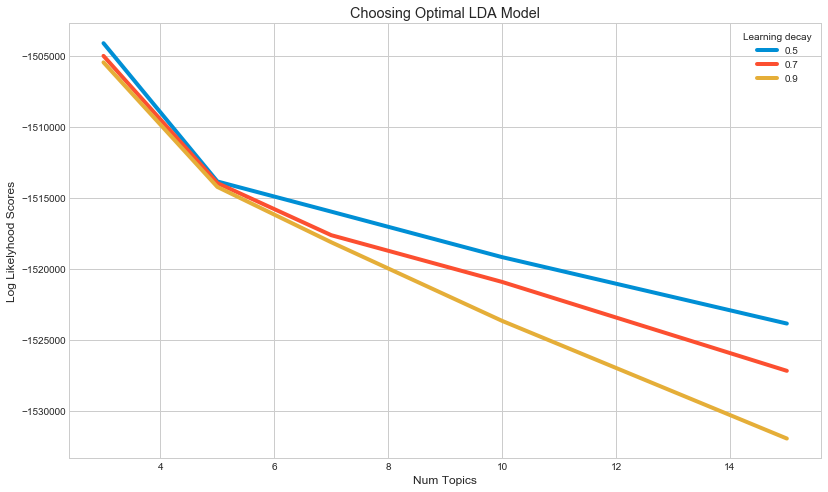

In [131]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [3,5,7,10, 15]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [132]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(X_all)

# column names
topicnames = ["Topic" + str(i) for i in range(1,4)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df_summary_unique["Message_title"]))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.tail(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [133]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0          2           1534
1          1           1160
2          0            762

## Visualising topics

### 3 topics

In [134]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, X_all, cvt, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      39.992913        1       1 -372.142456 -195.243271
1      33.570703        1       2 -437.769562 -443.703552
0      26.436384        1       3 -620.127258 -262.638367, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
3447  Default  3490.000000         medic  3490.000000  30.0000  30.0000
4420  Default  2389.000000  psychiatrist  2389.000000  29.0000  29.0000
2590  Default  3858.000000        health  3858.000000  28.0000  28.0000
3443  Default  1762.000000           med  1762.000000  27.0000  27.0000
2422  Default  2222.000000            gp  2222.000000  26.0000  26.0000
1462  Default  4745.000000       depress  4745.000000  25.0000  25.0000
4430  Default  2806.000000  psychologist  2806.000000  24.0000  24.0000
3480  Default  5118.000000        mental  5118.000000  23.0000  23.0000
3646  Default  1725.000000           mum  1725.000000  22.0000  22.0000
1660  Default  1749.000000        doctor  1749.000000  21.0000  21.0000
248   Default  3643.000000       anxieti  3643.000000  20.0000  20.0000
5497  Default  6030.000000       support  6030.000000  19.0000  19.0000
3610  Default  1680.000000        mother  1680.000000  18.0000  18.0000
2712  Default  2146.000000        hospit  2146.000000  17.0000  17.0000
1517  Default  1154.000000      diagnosi  1154.000000  16.0000  16.0000
2054  Default  3552.000000        famili  3552.000000  15.0000  15.0000
654   Default  1316.000000           bpd  1316.000000  14.0000  14.0000
6354  Default  8660.000000          work  8660.000000  13.0000  13.0000
5544  Default  1102.000000       symptom  1102.000000  12.0000  12.0000
552   Default  1301.000000       bipolar  1301.000000  11.0000  11.0000
2283  Default  4315.000000        friend  4315.000000  10.0000  10.0000
5832  Default  1202.000000     treatment  1202.000000   9.0000   9.0000
1610  Default  1372.000000        disord  1372.000000   8.0000   8.0000
3124  Default  1433.000000           kid  1433.000000   7.0000   7.0000
1516  Default  1211.000000       diagnos  1211.000000   6.0000   6.0000
3078  Default  2056.000000           job  2056.000000   5.0000   5.0000
925   Default  1209.000000      children  1209.000000   4.0000   4.0000
4026  Default  1311.000000        parent  1311.000000   3.0000   3.0000
4654  Default  1991.000000  relationship  1991.000000   2.0000   2.0000
1360  Default   932.000000      daughter   932.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
4207   Topic3   407.090121          play   662.097224   0.8441  -5.9824
3187   Topic3   254.632212         laugh   351.303961   1.0086  -6.4517
2283   Topic3  1619.153913        friend  4315.594303   0.3501  -4.6018
5685   Topic3  1843.332999       thought  5416.926660   0.2525  -4.4721
3248   Topic3  2190.111521          life  7001.595985   0.1682  -4.2998
4975   Topic3  1100.746358          self  2782.298623   0.4031  -4.9877
3205   Topic3   523.704053         learn   993.773545   0.6898  -5.7305
4552   Topic3   317.246330       realiti   498.069872   0.8794  -6.2318
1883   Topic3   500.741681         enjoy   979.671345   0.6593  -5.7754
4272   Topic3   606.278164         posit  1327.071016   0.5470  -5.5841
2487   Topic3   626.391277         group  1404.103850   0.5232  -5.5515
4548   Topic3   567.506905          real  1220.718067   0.5645  -5.6502
4288   Topic3   270.670341         power   403.044039   0.9323  -6.3906
3285   Topic3  1150.496229          live  3880.955864   0.1145  -4.9435
3433   Topic3   745.260514          mean  1992.321421   0.3471  -5.3777
3501   Topic3   492.703832            mi  1061.041956   0.5633  -5.7916
5392   Topic3   645.672993         stori  1733.950320   0.3426  -5.5212
6354   Topic3  1511.295020          work  8660.676787  -0.4154  -4.

In [135]:
# Show top n keywords for each topic
def show_topics(vectorizer=cvt, lda_model=lda_model, n_words=30):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=cvt, lda_model=best_lda_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0   Word 1  Word 2   Word 3   Word 4   Word 5   Word 6  \
Topic 0   life  thought  friend     work     mind     live     hope   
Topic 1   work   mental   medic   health  depress  support  anxieti   
Topic 2   life     hope    hard  support   famili     care   friend   

               Word 7 Word 8        Word 9  Word 10       Word 11 Word 12  \
Topic 0          self  world        mental    share          mean  social   
Topic 1  psychiatrist   hope  psychologist       gp           med  hospit   
Topic 2       thought   work    understand  depress  relationship    live   

            Word 13 Word 14  Word 15 Word 16 Word 17 Word 18 Word 19  
Topic 0  understand   stori    group   posit    real    fear   happi  
Topic 1      doctor     job  thought   manag    hard  disord     bpd  
Topic 2         mum  mother     pain  moment    home   night     kid

### 5 topics

In [151]:
# Build LDA Model
alternative_lda_model_4 = LatentDirichletAllocation(n_topics=5,learning_decay=0.5,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = alternative_lda_model_4.fit_transform(X_all)

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(alternative_lda_model_4, X_all, cvt, mds='tsne')
panel

C:\Users\Josh Lim\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


PreparedData(topic_coordinates=            Freq  cluster  topics          x          y
topic                                                  
4      30.958926        1       1  80.080467 -21.152933
3      29.827884        1       2  18.959558 -91.646767
2      16.305334        1       3  30.913298  -7.765105
0      14.051737        1       4  61.472927 -66.763527
1       8.856120        1       5  -1.261012 -44.873169, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
3447  Default  3588.000000         medic  3588.000000  30.0000  30.0000
5497  Default  5890.000000       support  5890.000000  29.0000  29.0000
2712  Default  2022.000000        hospit  2022.000000  28.0000  28.0000
4420  Default  2371.000000  psychiatrist  2371.000000  27.0000  27.0000
2422  Default  2131.000000            gp  2131.000000  26.0000  26.0000
2590  Default  3749.000000        health  3749.000000  25.0000  25.0000
3480  Default  5082.000000        mental  5082.000000  24.0000  24.0000
3443  Default  1815.000000           med  1815.000000  23.0000  23.0000
5473  Default  1614.000000        suicid  1614.000000  22.0000  22.0000
4430  Default  2726.000000  psychologist  2726.000000  21.0000  21.0000
6354  Default  8427.000000          work  8427.000000  20.0000  20.0000
1462  Default  4800.000000       depress  4800.000000  19.0000  19.0000
248   Default  3634.000000       anxieti  3634.000000  18.0000  18.0000
552   Default  1352.000000       bipolar  1352.000000  17.0000  17.0000
1610  Default  1426.000000        disord  1426.000000  16.0000  16.0000
4654  Default  2135.000000  relationship  2135.000000  15.0000  15.0000
803   Default  4282.000000          care  4282.000000  14.0000  14.0000
5001  Default  1254.000000        servic  1254.000000  13.0000  13.0000
1660  Default  1734.000000        doctor  1734.000000  12.0000  12.0000
5544  Default  1144.000000       symptom  1144.000000  11.0000  11.0000
2283  Default  4356.000000        friend  4356.000000  10.0000  10.0000
1517  Default  1201.000000      diagnosi  1201.000000   9.0000   9.0000
3078  Default  1957.000000           job  1957.000000   8.0000   8.0000
2054  Default  3668.000000        famili  3668.000000   7.0000   7.0000
3646  Default  1763.000000           mum  1763.000000   6.0000   6.0000
1516  Default  1259.000000       diagnos  1259.000000   5.0000   5.0000
24    Default  1368.000000          abus  1368.000000   4.0000   4.0000
5832  Default  1211.000000     treatment  1211.000000   3.0000   3.0000
5130  Default  2042.000000         sleep  2042.000000   2.0000   2.0000
3250  Default   635.000000       lifelin   635.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
4381   Topic5   113.775215       project   159.209352   2.0881  -6.1636
4232   Topic5    79.271296          poem    98.619672   2.2057  -6.5250
952    Topic5   117.897495        church   175.007078   2.0291  -6.1280
3625   Topic5   199.959032          movi   376.974183   1.7900  -5.5997
3992   Topic5    89.456945         paint   119.908144   2.1311  -6.4041
5193   Topic5   182.394500       societi   353.839755   1.7614  -5.6917
1167   Topic5   121.555689       content   191.752216   1.9682  -6.0975
622    Topic5   328.094202          book   887.699777   1.4287  -5.1045
3655   Topic5   247.771525         music   585.255879   1.5645  -5.3853
3987   Topic5   144.423223          page   252.961436   1.8636  -5.9251
4288   Topic5   192.768672         power   414.289883   1.6590  -5.6363
3743   Topic5   165.898311          news   322.905757   1.7581  -5.7865
1716   Topic5   186.096256         dream   408.452226   1.6380  -5.6716
6366   Topic5   378.651620         world  1581.450651   0.9946  -4.9612
4207   Topic5   235.557595          play   664.180923   1.3875  -5.4359
3480   Topic5   614.401812        mental  5082.064386   0.3112  -4.4772
3501   Topic5   285.121508           

In [152]:
def show_topics(vectorizer=cvt, lda_model=lda_model, n_words=30):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=cvt, lda_model=alternative_lda_model_4, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0   Word 1   Word 2      Word 3        Word 4        Word 5  \
Topic 0  support   health   mental      hospit  psychologist            gp   
Topic 1   mental    world     mind        book           god            mi   
Topic 2    medic  depress  anxieti         med          work  psychiatrist   
Topic 3     work     hope     hard        life           job         sleep   
Topic 4     life   friend   famili  understand  relationship          live   

         Word 6   Word 7  Word 8   Word 9       Word 10   Word 11  Word 12  \
Topic 0    care   suicid  servic     hope  psychiatrist   thought     hard   
Topic 1   stori  thought   music     play         polic     state     movi   
Topic 2  mental  bipolar  disord  thought       symptom  diagnosi   health   
Topic 3   night  thought  friend   moment          care      home  support   
Topic 4    hope  thought    hard     emot          self    mother     care   

         Word 13  Word 14    Word 15 Word 16  Word 17       Word 18  Word 19  
Topic 0  depress      mum     famili  doctor  appoint       anxieti  lifelin  
Topic 1    power    bulli     report   dream  creativ       societi   public  
Topic 2   doctor  diagnos  treatment    hope     mind  psychologist       gp  
Topic 3   stress  anxieti    depress    walk     live       struggl     hous  
Topic 4  support     hurt       abus   share   parent          pain   mental

# Word2Vec and word associations
* Word to vec has been used to understand word associations
* Below i only include posts with more than 500 words, approximately 50% of all posts scraped. This is done because some posts do not have much meaning and will therefore confuse the model
* I tried to fit the model ignoring stopwords and found it to be ineffective

## Cleaning data

In [144]:
word2vec_words = pd.DataFrame(all_threadsdf["message"].astype(str))

In [145]:
word2vec_words.head()

message
0                    is anyone around to talk to atm
1       Hi @outlanderhow are you?  what's happening?
2  @outlander of course. What's happening?\r\n\r\...
3    Hi @outlanderIs it ok if I sit with you awhile?
4  hi @NatalieS and thank youi dont usually creat...

In [146]:
word2vec_words["message_norepeat"] = word2vec_words["message"] 

In [147]:
# Using regex groups

pat1 = r"She gave away the secrets of her past .... she's lost control again .... see the danger always danger ....."
word2vec_words["message_norepeat"] = word2vec_words["message_norepeat"].str.replace(pat1," ")

pat2 = r"wake up in the middle of the thunder of a scream and you realise it was yours"
word2vec_words["message_norepeat"] = word2vec_words["message_norepeat"].str.replace(pat2," ")

pat3 = r"Accept my feelings. Know my purpose. Do what needs to be done"
word2vec_words["message_norepeat"] = word2vec_words["message_norepeat"].str.replace(pat3," ")

pat4 = r"Derive comfort from assigned purpose and fear not the uncertainty of freedom"
word2vec_words["message_norepeat"] = word2vec_words["message_norepeat"].str.replace(pat4," ")

pat0 = r"[^a-zA-Z]"
word2vec_words["message_norepeat"] = word2vec_words["message_norepeat"].str.replace(pat0," ")

In [148]:
# Checking to see if removed
word2vec_words[word2vec_words["message_norepeat"].str.contains("thunder")]

message  \
1725  Hi @thunderclap, \r\nWelcome to the forums! \r...   
1728  @thunderclap Hi thunderclap dont worry about p...   
1729  Hi @thunderclap and welcome to the forum. Look...   
1731  Exactly @thunderclap.No need for masks here, w...   
1733  G'day @thunderclap. Good to see you reposted t...   
1944  its so conflicting @soul if i cant hear noise ...   
974   Oh hi - it's early on Thursday morning and hig...   
975   Ha ha   @DecDec wrote:Oh hi - it's early on Th...   
642   Hey,I was diagnosed back in February, but it w...   
1445  I was once sad and lonely,Having nobody to com...   
1620  hey @kato Well done for blurting on the virtua...   

                                       message_norepeat  
1725  Hi  thunderclap    Welcome to the forums    Th...  
1728   thunderclap Hi thunderclap dont worry about p...  
1729  Hi  thunderclap and welcome to the forum  Look...  
1731  Exactly  thunderclap No need for masks here  w...  
1733  G day  thunderclap  Good to see you reposted t...  
1944  its so conflicting  soul if i cant hear noise ...  
974   Oh hi   it s early on Thursday morning and hig...  
975   Ha ha    DecDec wrote Oh hi   it s early on Th...  
642   Hey I was diagnosed back in February  but it w...  
1445  I was once sad and lonely Having nobody to com...  
1620  hey  kato Well done for blurting on the virtua...

In [149]:
def remove_names_stem(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    sb = SnowballStemmer("english")
    sentence = [sb.stem(word) for word in list(sentence) if not word in set(newStopWords)]
    
#     for word in list(sentence):
#         if word in set(newStopWords):
#             sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [153]:
word2vec_words["message_nonames"] = word2vec_words["message_norepeat"].apply(remove_names_stem)

In [154]:
word2vec_words["message_charlen"] = word2vec_words["message_nonames"].apply(len)
# Likes_df = all_threadsdf[all_threadsdf["message_charlen"] > 1000]

In [157]:
word2vec_words.head()

message  \
0                    is anyone around to talk to atm   
1       Hi @outlanderhow are you?  what's happening?   
2  @outlander of course. What's happening?\r\n\r\...   
3    Hi @outlanderIs it ok if I sit with you awhile?   
4  hi @NatalieS and thank youi dont usually creat...   

                                    message_norepeat  \
0                    is anyone around to talk to atm   
1       Hi  outlanderhow are you   what s happening    
2       outlander of course  What s happening          
3    Hi  outlanderIs it ok if I sit with you awhile    
4  hi  NatalieS and thank youi dont usually creat...   

                                     message_nonames  message_charlen  
0                     is anyon around to talk to atm               30  
1          hi  outlanderhow are you   what s happen                41  
2                     of cours  what s happen                      31  
3      hi  outlanderi it ok if i sit with you awhil                45  
4  hi  and thank youi dont usual creat new thread...              505

In [158]:
word2vec_words.iloc[4,2]

'hi  and thank youi dont usual creat new thread but atm it too hard be on my current thread  anyway     i found out today that my famili had a get togeth and not one person told me  not even mum  they had a great time  as they alway do without me but the comment on fb  i rejoin last week after delet my account  are all about miss my mum who was at work for a few hrs and how they wish she couldv join the first part of what they were do   make me feel crap know how much my famili doesnt  involv or care '

count    24706.0
mean       624.0
std        727.0
min          0.0
25%        190.0
50%        432.0
75%        816.0
max      15975.0
Name: message_charlen, dtype: float64


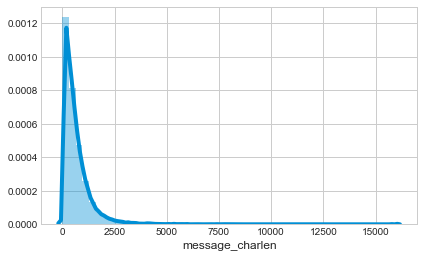

In [159]:
# Pick messages above 500 words
sns.distplot(word2vec_words["message_charlen"])
print(word2vec_words["message_charlen"].describe().round(0))

In [160]:
# Reduced from 24000 posts to 10000
print(">500 words", word2vec_words[word2vec_words["message_charlen"] > 500]["message_nonames"].shape)
print(">800 words", word2vec_words[word2vec_words["message_charlen"] > 800]["message_nonames"].shape)
print(">1000 words", word2vec_words[word2vec_words["message_charlen"] > 1000]["message_nonames"].shape)

>500 words (10944,)
>800 words (6339,)
>1000 words (4431,)


In [161]:
word2vec_words_selected = pd.DataFrame(word2vec_words[word2vec_words["message_charlen"] > 500]["message_nonames"])
word2vec_words_selected = word2vec_words_selected.reset_index().drop(columns = "index")

In [162]:
word2vec_words_selected.head()

message_nonames
0  hi  and thank youi dont usual creat new thread...
1  edit feb       this thread has evolv into a ch...
2  hi  i m afraid i m nowher near as good as othe...
3  hi     first  here s some more hug            ...
4  thank  former  realli appreci you take the tim...

In [163]:
word2vec_words_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 1 columns):
message_nonames    10944 non-null object
dtypes: object(1)
memory usage: 85.6+ KB


In [164]:
# # Performing stemming for no names
# corpus_list_split = []
# for i in range(0,len(word2vec_words_selected["message_nonames"])):
#     message = word2vec_words_selected["message_nonames"][i]
#     # Removing tag lines
#     message = message.lower().split()
# #     message = message
# #     message = [word for word in message if not word in set(stopwords)]
# #     sb = SnowballStemmer("english")
# #     message = [sb.stem(word) for word in message]
# #     message = " ".join(message)
#     message = re.sub("[^a-zA-Z]"," ",message)
#     corpus_list_split.append(message)
    
# # # corpus_stop  = [post for post in query if post.lower() not in oneword_stopwords]
# # listing = []
# # for post in corpus_stem_nostop_joined:
# #     listing.append(post.split())
    
# # Listing removed stop
# corpus_list_split_stoped=[]

# for post in corpus_list_split:
#     wr=[]
#     for word in post:
#         if word not in oneword_stopwords:
#             wr.append(word)
#         corpus_list_split_stoped.append(wr)

In [165]:
# Performing stemming for no names
corpus_list_split = []
for i in range(0,len(word2vec_words_selected["message_nonames"])):
    message = word2vec_words_selected["message_nonames"][i]
    message = message.lower().split()
    corpus_list_split.append(message)
    
# Listing removed stop
corpus_list_split_stoped=[]

for post in corpus_list_split:
    wr=[]
    for word in post:
        if word not in oneword_stopwords:
            wr.append(word)
    corpus_list_split_stoped.append(wr)

In [166]:
print(len(corpus_list_split))
print(len(corpus_list_split_stoped))

10944
10944


In [167]:
print(len(get_freq_words(corpus_list_split, columns)))
get_freq_words(corpus_list_split, columns)[0:30]

6453


work            8678
life            7254
hope            6862
support         6020
mental          5399
thought         5149
depress         5056
hard            4835
friend          4418
care            4244
live            4070
health          3940
anxieti         3868
famili          3746
understand      3745
medic           3508
psychologist    2752
self            2684
mind            2604
share           2587
moment          2286
struggl         2276
psychiatrist    2265
relationship    2124
emot            2115
end             2104
pain            2081
manag           2076
gp              2065
hospit          2053
dtype: int64

In [168]:
print(len(get_freq_words(corpus_list_split_stoped, columns)))
get_freq_words(corpus_list_split_stoped, columns)[180:230]

6453


play             662
father           653
anxious          645
miss             636
rest             630
appreci          629
episod           623
worker           622
terribl          621
journey          618
condit           616
recoveri         603
dog              600
dark             597
guy              595
exercis          593
lifelin          592
girl             591
anger            587
isol             587
upset            586
schizophrenia    585
strategi         577
music            575
exhaust          568
wife             567
heal             566
ex               542
patient          534
energi           526
public           525
employ           520
choic            516
pay              514
pressur          511
strength         509
ocd              506
valu             504
respect          503
grow             500
childhood        496
alcohol          493
realiti          490
brother          489
nurs             486
email            480
touch            479
dr           

## Fitting model
* I experimented with many word2vec parameter combinations. I found that have a window of 100, with min word count of 200 being optimal. When i used a larger window it seemed to think that many words were related with each other when they may not have been. Min count has been used to limit the number of words for visualisation purposes
* I also tried to fit the model ignoring stopwords and found it to be ineffective

In [171]:
# # Code to visualise using PCA, however TSNE better
# # fit a 2d PCA model to the vectors
# X = model_stop[model_stop.wv.vocab]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)

# # create a scatter plot of the projection
# plt.figure(figsize=(24, 24),dpi=600)
# plt.scatter(result[:, 0], result[:, 1])
# words = list(model_stop.wv.vocab)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# plt.show()

In [172]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16),dpi=1000) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],s = len(x)**0.3)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',fontsize=9)
    plt.show()

In [173]:
# # fit a 2d PCA model to the vectors
# X = model_stop[model_stop.wv.vocab]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)

# # create a scatter plot of the projection
# plt.figure(figsize=(24, 24),dpi=600)
# plt.scatter(result[:, 0], result[:, 1])
# words = list(model_stop.wv.vocab)
# for i, word in enumerate(words):
#     plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# plt.show()

In [ ]:
"""* size = size of the dense vector to represent each token or word (i.e. the context or neighboring words)
* window = max dinstance between target word and neighbouring words
* min_count = min frequency count of word
* workers = how many threads to use behind the scenes"""

In [2]:
model_stop = Word2Vec(corpus_list_split_stoped, window = 100, min_count=200)
print(model_stop)
# words_stop = list(model_stop.wv.vocab)
# print(words_stop)

In [175]:
tsne_plot(model_stop)

C:\Users\Josh Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [216]:
word = "mother"
pd.DataFrame(model_stop.most_similar(word,topn=7),columns=["word","distance"]).round(2)

C:\Users\Josh Lim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


word  distance
0   father      0.89
1  brother      0.77
2     sibl      0.74
3   sister      0.65
4      god      0.59
5     abus      0.58
6    older      0.57